<a href="https://colab.research.google.com/github/ghantamounika98/Privacy-SecureAI/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
NUM_CLASSES = 10
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential([
    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
    Flatten(),
    Dense(150, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

In [11]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
input_layer = Input(shape=(32,32, 3))
x = Flatten()(input_layer)
x = Dense(units=200, activation = 'relu')(x)
x = Dense(units=150, activation = 'relu')(x)
output_layer = Dense(units=10, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [13]:
x = Dense(units=200)(x)
x = Activation('relu')(x)

NameError: name 'Activation' is not defined

In [16]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0005) # Use learning_rate instead of lr
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [17]:
model.fit(x_train
              , y_train
              , batch_size = 32
              , epochs = 10
              , shuffle = True
              )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.2912 - loss: 1.9564
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4029 - loss: 1.6779
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.4313 - loss: 1.5834
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4510 - loss: 1.5385
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4695 - loss: 1.4915
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.4768 - loss: 1.4670
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4888 - loss: 1.4346
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4982 - loss: 1.4052
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.5050 - loss: 1.3887
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5109 - loss: 1.3694


In [18]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5005 - loss: 1.4085


[1.4133708477020264, 0.4975000023841858]

In [19]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog'
                       , 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


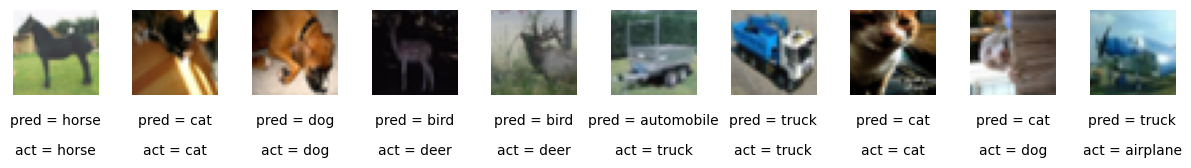

In [20]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)

In [25]:
from tensorflow.keras.layers import Input, Conv2D
input_layer = Input(shape=(64,64,1))
conv_layer_1 = Conv2D(filters = 2
        , kernel_size = (3,3)
        , strides = 1
        , padding = "same"
        )(input_layer)

In [28]:
input_layer = Input(shape=(32,32,3))
conv_layer_1 = Conv2D(
        filters = 10
        , kernel_size = (4,4)
        , strides = 2
        , padding = 'same'
        )(input_layer)
conv_layer_2 = Conv2D(
        filters = 20
        , kernel_size = (3,3)
        , strides = 2
        , padding = 'same'
        )(conv_layer_1)


In [29]:
flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)
model = Model(input_layer, output_layer)

In [34]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, LeakyReLU, Flatten, Dense, Dropout, Activation

input_layer = Input((32,32,3))
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x) # Now BatchNormalization is defined
x = LeakyReLU()(x)
x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)
x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)
model = Model(input_layer, output_layer)